<a href="https://colab.research.google.com/github/smitaforward/Data_Science/blob/master/Text_Classification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://realpython.com/python-keras-text-classification/

In [1]:
# load the file from drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Prep Data

In [4]:
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [0]:
import pandas as pd

filepath_dict = {'yelp':'drive/My Drive/data/sentiment labelled sentences/yelp_labelled.txt',
               'amazon':'drive/My Drive/data/sentiment labelled sentences/amazon_cells_labelled.txt',
               'imdb': 'drive/My Drive/data/sentiment labelled sentences/imdb_labelled.txt'}

In [0]:
df_list = []
for source, filepath in filepath_dict.items():
  df = pd.read_csv(filepath, names = ['sentence','label'], sep = '\t')
  df['source'] = source
  df_list.append(df)

In [0]:
df = pd.concat(df_list)

In [5]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [0]:
df.tail()

,sentence,label,source
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb
747,All in all its an insult to one's intelligence...,0,imdb


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 747
Data columns (total 3 columns):
sentence    2748 non-null object
label       2748 non-null int64
source      2748 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


# Base Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


In [0]:
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values
  
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                      test_size = 0.25, random_state = 1234)
  vectorizer = CountVectorizer()
  vectorizer.fit(sentences_train)
  X_train = vectorizer.transform(sentences_train)
  X_test = vectorizer.transform(sentences_test)
  
  classifier = LogisticRegression()
  classifier.fit(X_train, y_train)
  
  score=classifier.score(X_test,y_test)
  print("Accuracy for {} data: {:.4f}".format(source, score))
  

Accuracy for yelp data: 0.8160
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7380


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# keras with BOW

In [0]:
from keras.models import Sequential
from keras import layers

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  x = range(1, len(acc)+1)
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  
  plt.plot(x, acc, 'b',label = 'Training acc')
  plt.plot(x, val_acc,'r', label = 'Validation acc')
  plt.title('Training and Validation Accuracy')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.legend()
  

Accuracy for yelp data: 0.7840
Accuracy for amazon data: 0.8160
Accuracy for imdb data: 0.6898


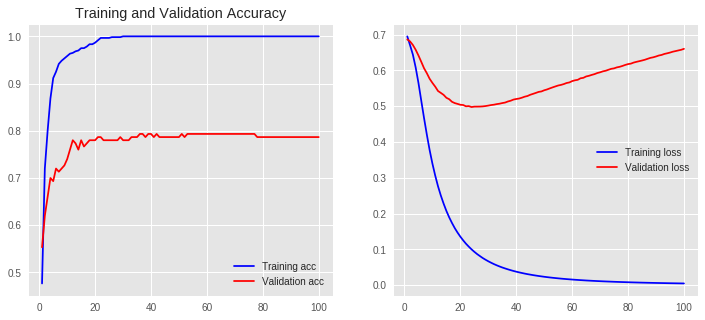

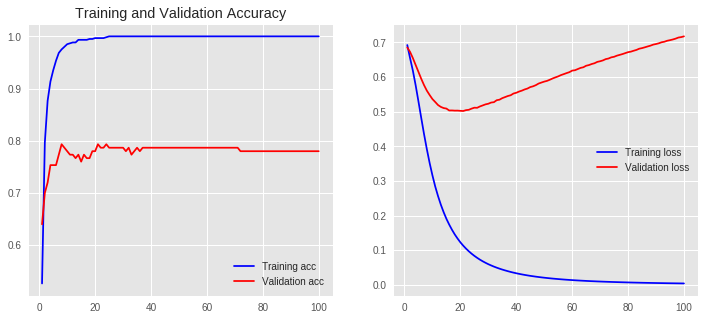

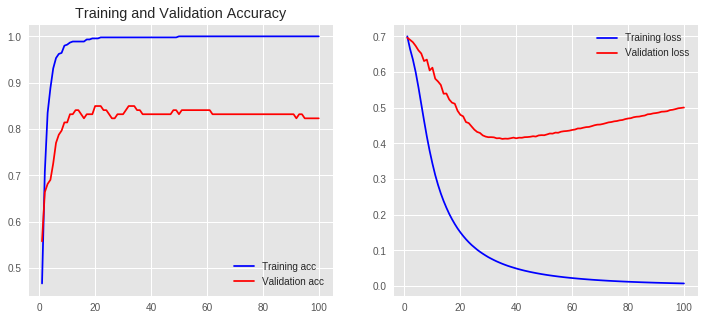

In [0]:
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values
  
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                      test_size = 0.25, random_state = 1234)
  vectorizer = CountVectorizer()
  vectorizer.fit(sentences_train)
  X_train = vectorizer.transform(sentences_train)
  X_test = vectorizer.transform(sentences_test)
  
  input_dim = X_train.shape[1]
  
  model = Sequential()
  model.add(layers.Dense(10, input_dim = input_dim, activation = 'relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))
  
  model.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])
  
  history = model.fit(X_train,y_train, epochs = 100, verbose = 0, 
            validation_split = 0.2,
           batch_size = 32)
  
  plot_history(history)
  
  loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
  
  print("Accuracy for {} data: {:.4f}".format(source, accuracy))




# keras with local word embedding

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
maxlen = 100
embedding_dim = 50

Accuracy for yelp data: 0.7800
Accuracy for amazon data: 0.8360
Accuracy for imdb data: 0.7326


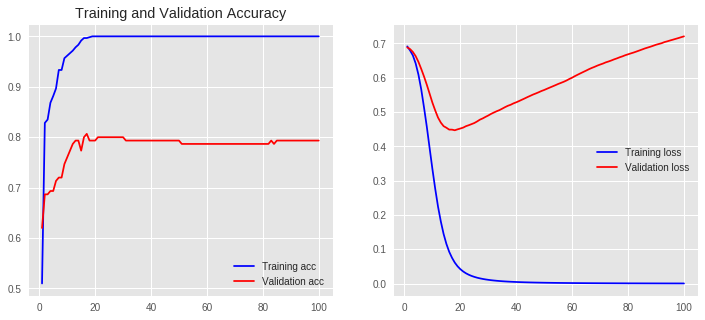

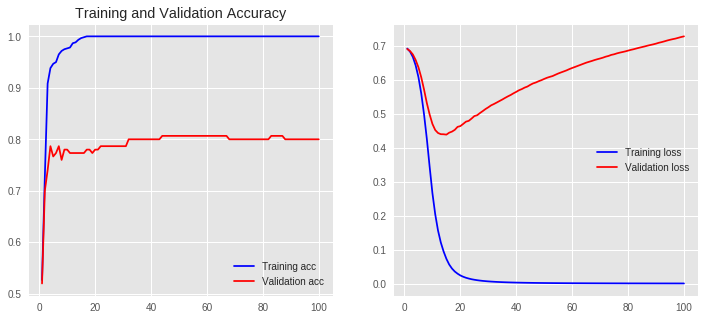

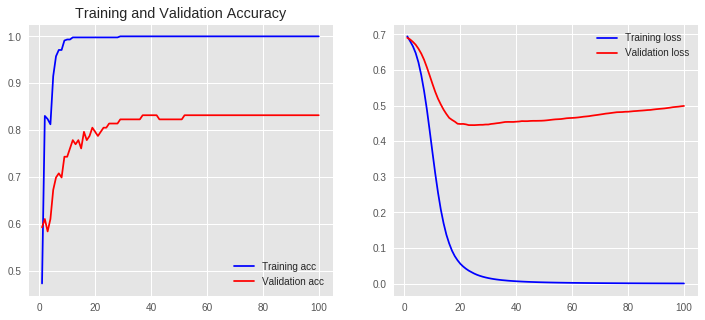

In [0]:
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values
  
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                      test_size = 0.25, random_state = 1234)
  tokenizer = Tokenizer(num_words = 5000)
  tokenizer.fit_on_texts(sentences_train)
  X_train = tokenizer.texts_to_sequences(sentences_train) # num_words will be applied
  X_test = tokenizer.texts_to_sequences(sentences_test)
  vocab_size = len(tokenizer.word_index)+1 #tokenizer won't apply num_words
  
  X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
  X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
  
  
  model = Sequential()
  model.add(layers.Embedding(input_dim = vocab_size,
                         output_dim = embedding_dim,
                         input_length = maxlen))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(10, activation = 'relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
  
  
  history = model.fit(X_train,y_train, epochs = 100, verbose = 0, 
            validation_split = 0.2,
           batch_size = 32)
  
  plot_history(history)
  
  loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
  
  print("Accuracy for {} data: {:.4f}".format(source, accuracy))

# keras with pretrained word embedding

In [13]:
!mkdir data && wget http://nlp.stanford.edu/data/glove.6B.zip && unzip glove.6B.zip -d data/

--2019-01-18 20:54:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-01-18 20:54:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  7.81MB/s    in 70s     

2019-01-18 20:55:10 (11.8 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: data/glove.6B.50d.txt   
  inflating: data/glove.6B.100d.txt  
  inflating: data/glove.6B.200d.txt  
  inflating: data/glove.6B.300d.txt  


In [0]:
import numpy as np
def create_embedding_matrix(filepath,word_index, embedding_dim):
  vocab_size = len(word_index)+1
  embedding_matrix=np.zeros((vocab_size, embedding_dim))
  
  with open(filepath) as f:
    for line in f:
      word, *vector = line.split()
      if word in word_index:
        idx = word_index[word]
        embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
  return embedding_matrix      

Accuracy for yelp data: 0.7600
Accuracy for amazon data: 0.8320
Accuracy for imdb data: 0.7594


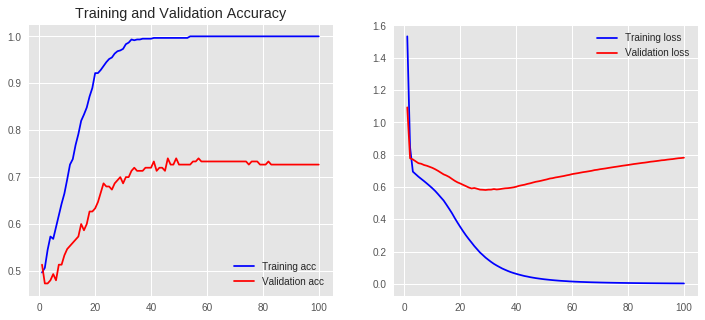

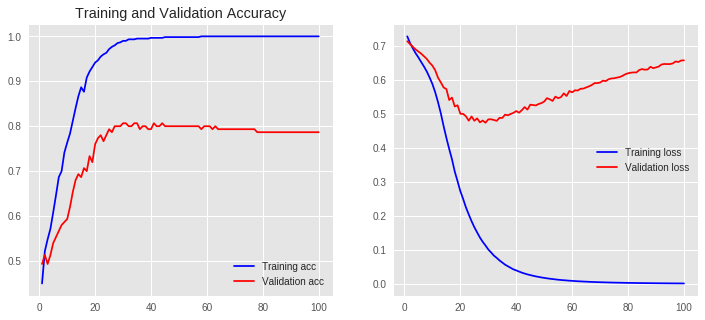

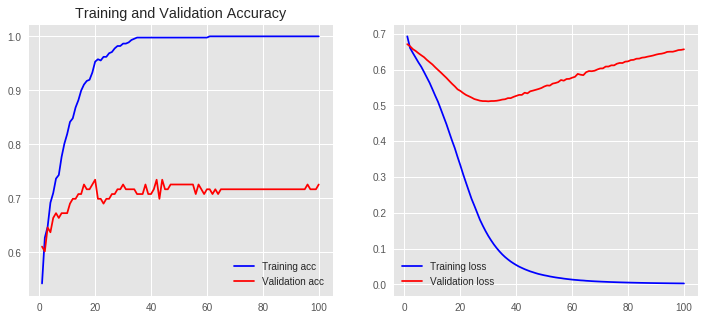

In [33]:
# 
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values
  
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                      test_size = 0.25, random_state = 1234)
  tokenizer = Tokenizer(num_words = 5000)
  tokenizer.fit_on_texts(sentences_train)
  X_train = tokenizer.texts_to_sequences(sentences_train) # num_words will be applied
  X_test = tokenizer.texts_to_sequences(sentences_test)
  vocab_size = len(tokenizer.word_index)+1 #tokenizer won't apply num_words
  
  X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
  X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
  
  embedding_matrix = create_embedding_matrix('data/glove.6B.50d.txt',
                                          tokenizer.word_index,
                                          embedding_dim = 50)
  model = Sequential()
  model.add(layers.Embedding(input_dim = vocab_size,
                             output_dim = embedding_dim,
                             weights=[embedding_matrix],
                             input_length = maxlen,
                             trainable= True)) # allow the embedding layer to be trainable
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(10, activation = 'relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
  
  
  history = model.fit(X_train,y_train, epochs = 100, verbose = 0, 
            validation_split = 0.2,
           batch_size = 32)
  
  plot_history(history)
  
  loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
  
  print("Accuracy for {} data: {:.4f}".format(source, accuracy))

Accuracy for yelp data: 0.8040
Accuracy for amazon data: 0.8080
Accuracy for imdb data: 0.7754


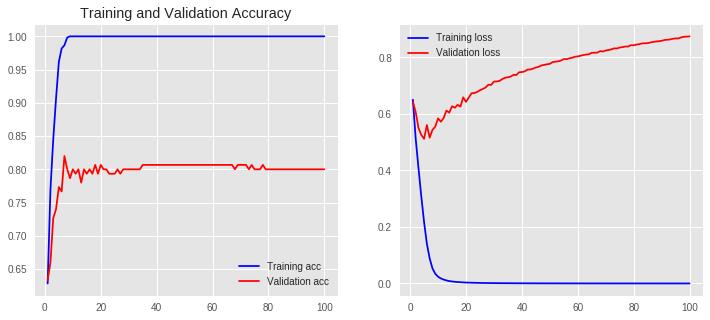

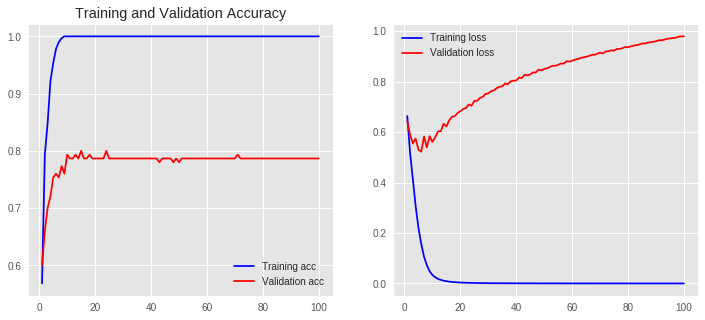

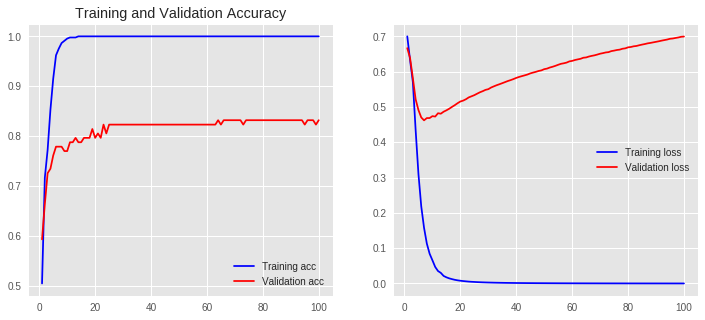

In [35]:
# CNN

for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values
  
  sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, 
                                                                      test_size = 0.25, random_state = 1234)
  tokenizer = Tokenizer(num_words = 5000)
  tokenizer.fit_on_texts(sentences_train)
  X_train = tokenizer.texts_to_sequences(sentences_train) # num_words will be applied
  X_test = tokenizer.texts_to_sequences(sentences_test)
  vocab_size = len(tokenizer.word_index)+1 #tokenizer won't apply num_words
  
  X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
  X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
  
  embedding_matrix = create_embedding_matrix('data/glove.6B.50d.txt',
                                          tokenizer.word_index,
                                          embedding_dim = 50)
  model = Sequential()
  model.add(layers.Embedding(input_dim = vocab_size,
                             output_dim = embedding_dim,
                             weights=[embedding_matrix],
                             input_length = maxlen,
                             trainable= True)) # allow the embedding layer to be trainable
  model.add(layers.Conv1D(128, 5, activation='relu'))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(10, activation = 'relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
  
  
  history = model.fit(X_train,y_train, epochs = 100, verbose = 0, 
            validation_split = 0.2,
           batch_size = 32)
  
  plot_history(history)
  
  loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
  
  print("Accuracy for {} data: {:.4f}".format(source, accuracy))

#Hyperparameters Optimization

In [0]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'data/output.txt'

# Run grid search for each source (yelp, amazon, imdb)
for source, frame in df.groupby('source'):
    print('Running grid search for data set :', source)
    sentences = df['sentence'].values
    y = df['label'].values

    # Train-test split
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    # Tokenize words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
    vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    # Parameter grid for grid search
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
    grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
    test_accuracy = grid.score(X_test, y_test)

    # Save and evaluate results
    prompt = input(f'finished {source}; write to file and proceed? [y/n]')
    if prompt.lower() not in {'y', 'true', 'yes'}:
        break
    with open(output_file, 'a') as f:
        s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
        output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
        print(output_string)
        f.write(output_string)

Running grid search for data set : amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

# BERT
https://github.com/hanxiao/bert-as-service#training-a-text-classifier-using-bert-features-and-tfestimator-api

# FASTAI

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [9]:
# install fastai on colab
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

#conda install -c pytorch -c fastai fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 20kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62a12000 @  0x7fb20f5ae2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 163kB 10.0MB/s 
    100% |████████████████████████████████| 61kB 21.5MB/s 
    100% |████████████████████████████████| 591.8MB 22kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62484000 @  0x7feebd1e52a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507

In [0]:
from fastai import *
from fastai.text import *

In [11]:
data = df[['label','sentence']]
data.head()

,label,sentence
0,1,Wow... Loved this place.
1,0,Crust is not good.
2,0,Not tasty and the texture was just nasty.
3,1,Stopped by during the late May bank holiday of...
4,1,The selection on the menu was great and so wer...


In [0]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(data, stratify = data['label'], test_size = 0.4, random_state = 1234)

In [0]:
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = '')

In [0]:
data_clas = TextClasDataBunch.from_df(path = '',train_df = df_trn, valid_df = df_val, 
                                      vocab = data_lm.train_ds.vocab,
                                     bs = 32)

In [0]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult = 0.7)

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


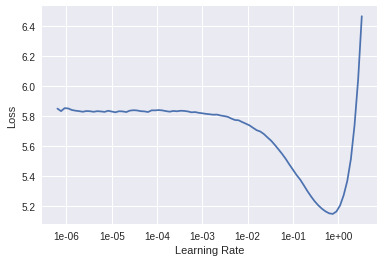

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy
1,5.313193,4.315203,0.213393


In [0]:
learn.save_encoder('ft_enc')

In [0]:
learn = text_classifier_learner(data_clas, drop_mult = 0.7)

In [0]:
learn.load_encoder('ft_enc')

In [23]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy
1,0.681191,0.641306,0.640909


In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-1)